# Integers

Integrers number are represented by N bits words. Python 3 allows you to store integers with practically unlimited precision, the only limitation comes from the (contiguos) space available in memory.
In python 2, N depends on the PC architercture, N=64 in modern computers.

Typically 1 bit is dedicated to specifying the sign of the number, thus the conversion between binary and decimal representation is:

$$d = (-1)^j\sum_{i=0}^{N-1} \alpha_i ~ 2^i$$

where $\alpha_i$ are either 0 or 1. 
$b=\alpha_{N-1}\alpha_{N-2}..\alpha_0$ is the binary representation of the number.

## Notes

We're not going deep into how computer works but only in memorization of numbers. They are represented in their binary formats, even we're not dealing usually with them, conversione are needed to be understood.
The translation of an integer from a base to an other is straight forward, using a linear combination of powers of two (binary representation).
Python allows to memorize with unlimited precision but of course there are limits in space available in our pc's memory.

## Sys library
It contains a lot of information on our system. For example the max size can be exceeded.

In [7]:
import sys
print (sys.maxsize)

# check 
print (2**63-1 == sys.maxsize)

# python 3 doesn't have a limit for integers
print (sys.maxsize+1)

2147483647
False
2147483648


incidentally note that python 3 recast int to floats when dividing them with `/`. To keep the old functionality of `/`, use instead `//`

In [1]:
print (2/3)
print (2//3)
#la seconda è una divisione intera anzichè float e mi ressituisce di conseguenza zero 

0.6666666666666666
0


## Binary and Hexadecimal representations

numbers values (in python as all the other languages) are assumed to be expressed as decimal. Built-in functions allows explicitly to convert from one representation to another.  

## Why are we talking about this?
Tipically very low kind of data coming from sensors for exaple they are low level in order to exploit the compactness of the format. 
They go out in binary or hexadecimal representations, not processed yet.
There are built-in functions that do the conversion, to take them back we can easily cast them into the int type (the last two rows of code).
Bin() and hex() give strings as output and we can check the different representation with the b or x letter after the first number printed out.

In [3]:
# an integer in decimal representation
a=18

# its binary representation
a_bin = bin(a)
print('Binary representation of',a,':', a_bin)

# its hexadecimal representation
a_hex = hex(a)
print('Hexadecimal representation of',a,':', a_hex)

# converting back to integer
print('Decimal representation of',a_bin,':', int(a_bin,2))
print('Decimal representation of',a_hex,':', int(a_hex,16))



Binary representation of 18 : 0b10010
Hexadecimal representation of 18 : 0x12
Decimal representation of 0b10010 : 18
Decimal representation of 0x12 : 18


## Bitwise operators
Imagine we have a sensor measuring temperature, umidity of the room. The data coming out of the sensor are words (64-bits for example) merging the measurements. We have to know th subsets of letters reserved to pressure, temperature exc...

### Logical operators

In [4]:
a = 60            # 60 = 0011 1100 
b = 13            # 13 = 0000 1101 

c = a & b;        # 12 = 0000 1100
print ("Logical AND ", c)

c = a | b;        # 61 = 0011 1101 
print ("Logical OR ", c)

c = a ^ b;        # 49 = 0011 0001
print ("Logical XOR ", c)

Logical AND  12
Logical OR  61
Logical XOR  49


### Unary operators

In [ ]:
c = ~a;           # -61 = 1100 0011
print ("Negation of a  ", c)

### Masks and shifts

Shifting the representation of the number adding in the end zeros. When adding a mask into the data we then shift that.

In [ ]:
c = a << 2;       # 240 = 1111 0000
print ("Left shift (towards most significant) of two positions ", c)

c = a >> 2;       # 15 = 0000 1111
print ("Right shift (towards least significant) of two positions ", c)

## Shifting masks and float numbers
Due to impossibility of using an infinite precision we have to decide which numbers to memorize.
Single precision numbers are represented by 32-bits (a cell in the memory 32-bits long), double use 64-bits long cells. Sometimes we might end up to manage to a lot of double numbers, we need to be wise and use only what we need. Nowadays distintion between float and double doesn't exist, float in python for example are reserved a memory of 64-bits.
There are three numbers that can vary in assigning a float number:
s the sign (positive or negative number), f the fractional part of the mantissa, bias and the exponent.


# Floating point numbers

non-integer number cannot be represent with infinite precision on a computer. Single (also known as *float*) and double precision numbers are assigned 32 and 64 bits respectively. 
Note that all floating point numbers in python are double precision (64 bits).
A standard has been developed by IEEE such that the relative precision (see later) is the same in the whole validity range.

The 32 or 64 bits are divided among 3 quantities uniquely characterizing the number:

$x_{float} = (-1)^s \times 1.f \times 2^{e-bias}$

where *s* is the sign, *f* the fractional part of the mantissa and *e* the exponent. In order to get numbers smaller than 1, a constant *bias* term is added to the exponent, such *bias* is typically equal to half of the max value of *e*.
The mantissa is defined as:

${\rm mantissa}=1.f=1+m_{n-1}2^{-1}+m_{n-2}2^{-2}+..+m_{0}2^{-n}$

where $n$ is the number of bits dedicated to *f* (see below) and $m_i$ are the binary coefficients. 

Numbers exceeding the maximum allowed value are *overflows* and the calculations involving them provide incorrect answers. Numbers smaller in absolute value than the minimum allowed value are *underflows* and simply set to zero, also in this case incorrect results are yielded.  

### Single

For single precision floating point numbers, $0\le e \le 255$ and $bias=127$. Bits are arranged as follows:

|   | *s* | *e* | *f* |
|---|---|---|---|
| Bit position | 31 | 30-23 | 22-0 |

Special values are also possibiles. N.B.: those are not numbers that can be used in the mathematical sense!

|   |  conditions | value |
|---|---|---|
|  $+\infty$ | s=0, e=255, f=0 | +INF  |
|  $-\infty$ | s=1, e=255, f=0 | -INF  |
|  not a number | e=255, f>0  | NaN  |

The largest value is obtained for $f\sim 2$ and $e=254$, i.e. $2\times2^{127}\sim 3.4\times10^{38}$.

The value closest to zero is obtained instead for $f=2^{-23}$ and $e=0$, i.e. $2^{-149}\sim 1.4\times10^{-45}$.

An example is given below:

In [5]:
from IPython.display import Image
Image(url='http://www.dspguide.com/graphics/F_4_2.gif')

### Double

For double precision floating point numbers, $0\le e \le 2047$ and $bias=1023$. Bits are arranged as follows:

|   | *s* | *e* | *f* |
|---|---|---|---|
| Bit position | 63 | 62-52 | 51-0 |

Special values are also possibiles. N.B.: those are not numbers that can be used in the mathematical sense!

|   |  conditions | value |
|---|---|---|
|  $+\infty$ | s=0, e=2047, f=0 | +INF  |
|  $-\infty$ | s=1, e=2047, f=0 | +INF  |
|  not a number | e=2047, f>0  | NaN  |

The validity range for double numbers is $2.2^{-308} - 1.8^{308}$

Serious scientific calculations almost always requires at least double precision floating point numbers

### Floating point numbers on your system

Information about the floating point reresentation on your system can be obtained from sys.float_info. Definitions of the stored values are given on the python doc [page](https://docs.python.org/2/library/sys.html#sys.float_info)

In [6]:
import sys
print (sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


epsilon is the accuracy we are going to talk now:

# Accuracy and the perils of calculations with floats


Floats can only have a limited number of meaningful decimal places, on the basis of how many bits are allocated for the fractional part of the mantissa: 6-7 decimal places for singles, 15-16 for doubles. In particular this means that calculations involving numbers with more than those decimal places involved do not yield the correct result, simply because the binary representation of those numbers could not store them properly.

First example: we want to add more and more small numbers. At a certain point we notice the correction is too small to be rendered by the computer. $10^{-16}$ cannot be added to the number 7

In [7]:
for e in [14,15,16]: print (7+1.0*10**-e)

7.00000000000001
7.000000000000001
7.0


It should never been forgotten that computers store numbers in binary format. In the same way it is not possible to express the fraction 1/3 with a finite decimal places, analogously fraction well represented in the decimal base cannot be represented in binary, e.g. 1/10 is the infinitely repeating number:

$0.0001100110011001100110011001100110011001100110011...$

corresponding to $3602879701896397/2^{55}$ which is close to but not exactly equal to the true value of 1/10 (even though it is even printed to be like that!!.
Similarly 0.1 is not 1/10, and making calculations assuming that exactly typically yield to wrong results:

In [8]:
# is 1/10 the same of 0.1?
print (1/10)

# but then whatch out!!
0.1 + 0.1 + 0.1 == 0.3


0.1


False

Here a comparison in a boolean sense two float number is not a good idea because exact representations of float numbers does not exist!!!
In the memory of the computer what there is on the left is memorized in binary way and corresponds to an approximation in 0 and 1


A lesson of paramount importance is that you must never compare floating point numbers with the "==" operator as **what is printed is not what is stored**!!

The function ```float.hex()``` yield the exact value stored for a floating point number:

In [11]:
import math
x=math.pi
print (x)
print (x.hex())

3.141592653589793
0x1.921fb54442d18p+1


There are ways to print floats (e.g. filling data into an output file) controlling the number of decimals:

In [15]:
print (format(math.pi, '.13f'))  # give 13 significant digits

print ('%.16f' % (0.1 * 0.1 * 100)) # give 15 significant digits

# now repeat trying with >15 digits!


3.1415926535898
1.0000000000000002


There is no bug here, this is simply due to the fact that the mantissa is represented by a limited amount of bits, therefore calculations can only make sense if a corresponding number of decimal digits are concerned:

In [ ]:
# 23 bits are used for f in single precision floating points 
print (2**-23)

# 53 bits are used for f in single precision floating points 
print (2**-53)

A typical case is subtraction of numbers very close by in value (e.g. when dealing with spectral frequencies). The same happens with functions evaluated near critical points (see later)

In [16]:
1 + 6.022e23 - 6.022e23

0.0

Associative law does not necessarily hold:

In [17]:
print (6.022e23 - 6.022e23 + 1)
print (1 + 6.022e23 - 6.022e23)


1.0
0.0


Distributive law does not hold

In [18]:
import math
a = math.exp(1);
b = math.pi;
c = math.sin(1);
a*(b+c) == a*b+a*c

False

In [ ]:
# (we'll see numpy soon, bear with me for the moment)

# loss of precision can be a problem when calculating likelihoods
import numpy as np
probs = np.random.random(1000)
print (np.prod(probs))

# when multiplying lots of small numbers, work in log space
print (np.sum(np.log(probs)))

## From numbers to Functions: Stability and conditioning


Suppose we have a computer algorithm $g(x)$ that represents the mathematical function $f(x)$. $g(x)$ is stable if for some small perturbation $\epsilon$, $g(x+\epsilon)\simeq f(x)$

A mathematical function $f(x)$ is well-conditioned if $f(x+\epsilon)\simeq f(x)$ for all small perturbations $\epsilon$. 

That is, the functionf(x) is **well-conditioned** if the solution varies gradually as problem varies. For a well-conditinoed function, all small pertubations have small effects. However, a poorly-conditioned problem only needs some small perturbation to have large effects. For example, inverting a nearly singluar matrix is a poorly conditioned problem.

**(for example if $0.1+0.1+0.1$ is given to an algorithm it would be the same as give to it $0.3$ if $g(x)$ is stable)**

A numerical algorithm $g(x)$ is numerically-stable if $g(x)\simeq f(x′)$ for some $x′\simeq x$. Note that stability is a property that relates the algorithm $g(x)$ to the problem $f(x)$.

That is, the algorithm $g(x)$ is **numerically stable** if it gives nearly the right answer to nearly the right question. Numerically unstable algorithms tend to amplify approximation errors due to computer arithmetic over time. If we used an infinite precision numerical system, stable and unstable alorithms would have the same accuracy. However, as we have seen (e.g. variance calculation), when using floating point numbers, algebrically equivalent algorithms can give different results.

In general, we need both a well-conditioned problem and numerical stabilty of the algorihtm to reliably accurate answers. In this case, we can be sure that $g(x)\simeq f(x)$.

In most of the cases, the solution to stability issues is properly redefing the function as in the example above with the likelihood. More examples follow  

In [21]:
# The tangent function is poorly conditioned

import math
x1 = 1.57078
x2 = 1.57079
t1 = math.tan(x1)
t2 = math.tan(x2)

print ('t1 =', t1)
print ('t2 =', t2)
print ('% change in x =', 100.0*(x2-x1)/x1)
print ('% change in tan(x) =', (100.0*(t2-t1)/t1))

t1 = 61249.008531503045
t2 = 158057.9134162482
% change in x = 0.0006366263894271296
% change in tan(x) = 158.05791343536947


For example when computing the slope of an interpolating line. The algorithm giving the slope (tangent) is unstable when the line tends to be vertical

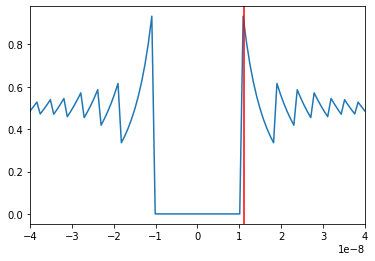

In [3]:
# Catastrophic cancellation occurs when subtracitng
# two numbers that are very close to one another
# Here is another example
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x):
    return (1 - np.cos(x))/(x*x)

x = np.linspace(-4e-8, 4e-8, 100)
plt.plot(x,f(x));
plt.axvline(1.1e-8, color='red')
plt.xlim([-4e-8, 4e-8]);


In [4]:
# We know from L'Hopital's rule that the answer is 0.5 at 0
# and should be very close to 0.5 throughout this tiny interval
# but errors arisee due to catastrophic cancellation

print ('%.30f' % np.cos(1.1e-8))
print ('%.30f' % (1 - np.cos(1.1e-8))) # exact answer is 6.05e-17
print ('%2f' % ((1 - np.cos(1.1e-8))/(1.1e-8*1.1e-8)))

0.999999999999999888977697537484
0.000000000000000111022302462516
0.917540


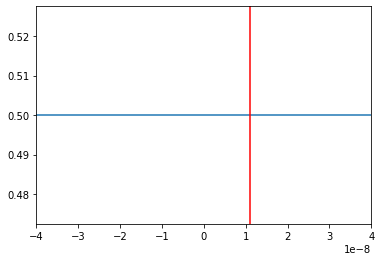

In [5]:
# Numerically stable version of funtion using simple trignometry

def f1(x):
    return 2*np.sin(x/2)**2/(x*x)

x = np.linspace(-4e-8, 4e-8, 100)
plt.plot(x,f1(x));
plt.axvline(1.1e-8, color='red')
plt.xlim([-4e-8, 4e-8]);

Stable and unstable version of the variance:

$s^2 = \frac{1}{n-1} \sum (x-\bar{x})^2$

In [25]:
# sum of squares method (vectorized version)
# watch out! big number minus big number!
def sum_of_squers_var(x):
    n = len(x)
    return (1.0/(n*(n-1))*(n*np.sum(x**2) - (np.sum(x))**2))

# direct method
# squaring occuring after subtraction
def direct_var(x):
    n = len(x)
    xbar = np.mean(x)
    return 1.0/(n-1)*np.sum((x - xbar)**2)


# Welford's method
# an optimized method
def welford_var(x):
    s = 0
    m = x[0]
    for i in range(1, len(x)):
        m += (x[i]-m)/i
        s += (x[i]-m)**2
    return s/(len(x) -1 )

In [26]:
# check the performances with an array 
# of randomly distributed data around 1e3

x_ = np.random.uniform(0,1,int(1e3))
x = 1e12 + x_

# correct answer
print (np.var(x_))

print (sum_of_squers_var(x))
print (direct_var(x))
print (welford_var(x))

0.08240735093062704
-140878366.72205004
0.08248991860045088
0.08192782694692011
